# Prerequisite Python Packages

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Acquisition of Stock Data

In [2]:
market_data = yf.download('SPY', start='2017-01-01', end='2022-10-27')

[*********************100%***********************]  1 of 1 completed


# Visualizing SPY Prices History

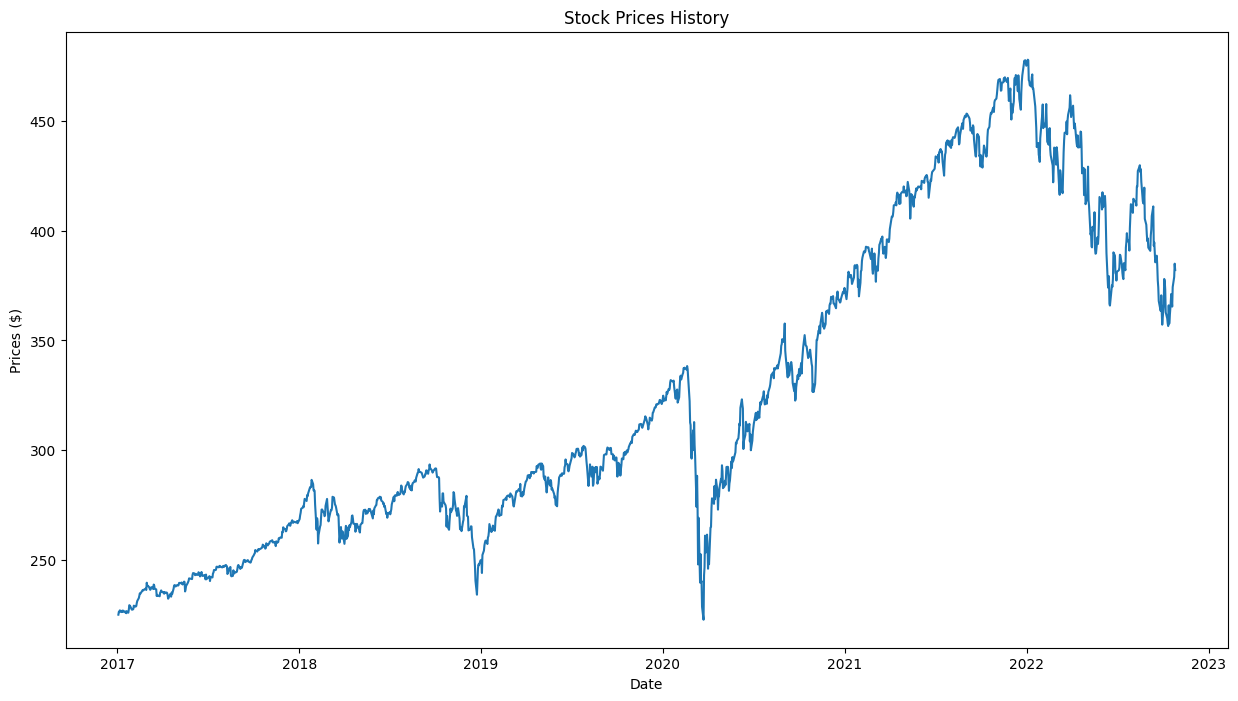

In [3]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(market_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.savefig("spy_close_prices.png")

# Data Preprocessing

In [4]:
# Extract the closing prices from the acquired stock data and convert it to a number series.
close_prices = market_data['Close']
values = close_prices.values

# Calculate the data size for 80% of the dataset. The math.ceil method is to ensure the data size is 
#rounded up to an integer.
training_data_len = math.ceil(len(values)*0.8)

# MinMaxScaler to normalize our data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

#Create a 60-days window of historical prices (i-60) as our feature data (x_train) 
# and the following 60-days window as label data (y_train).
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    

# Convert the feature data (x_train) and label data (y_train) into Numpy array as it is the data format 
#accepted by the Tensorflow when training a neural network model.    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Preparation of test set

In [5]:
#Extract the closing prices from our normalized dataset (the last 20% of the dataset).
test_data = scaled_data[training_data_len-60: , : ]

#Similar to the training set, we will have to create feature data (x_test) and label data (y_test)from our test set.
x_test = []
y_test = values[training_data_len:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


# Convert the feature data (x_test) and label data (y_test) into Numpy array. 
#Reshape again the x_test and y_test into a three-dimensional array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Setting Up LSTM Network Architecture

In [6]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


# Training LSTM Model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1112/1112 [==============================] - 18s 14ms/step - loss: 0.0020
Epoch 2/3
1112/1112 [==============================] - 16s 14ms/step - loss: 7.7385e-04
Epoch 3/3
1112/1112 [==============================] - 16s 14ms/step - loss: 5.9948e-04


# Model Evaluation

In [8]:
#Apply the model to predict the stock prices based on the test set.
#Use the inverse_transform method to denormalize the predicted stock prices.

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 14ms/step


C:\Users\gerar\AppData\Local\Temp\ipykernel_22684\2368900175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


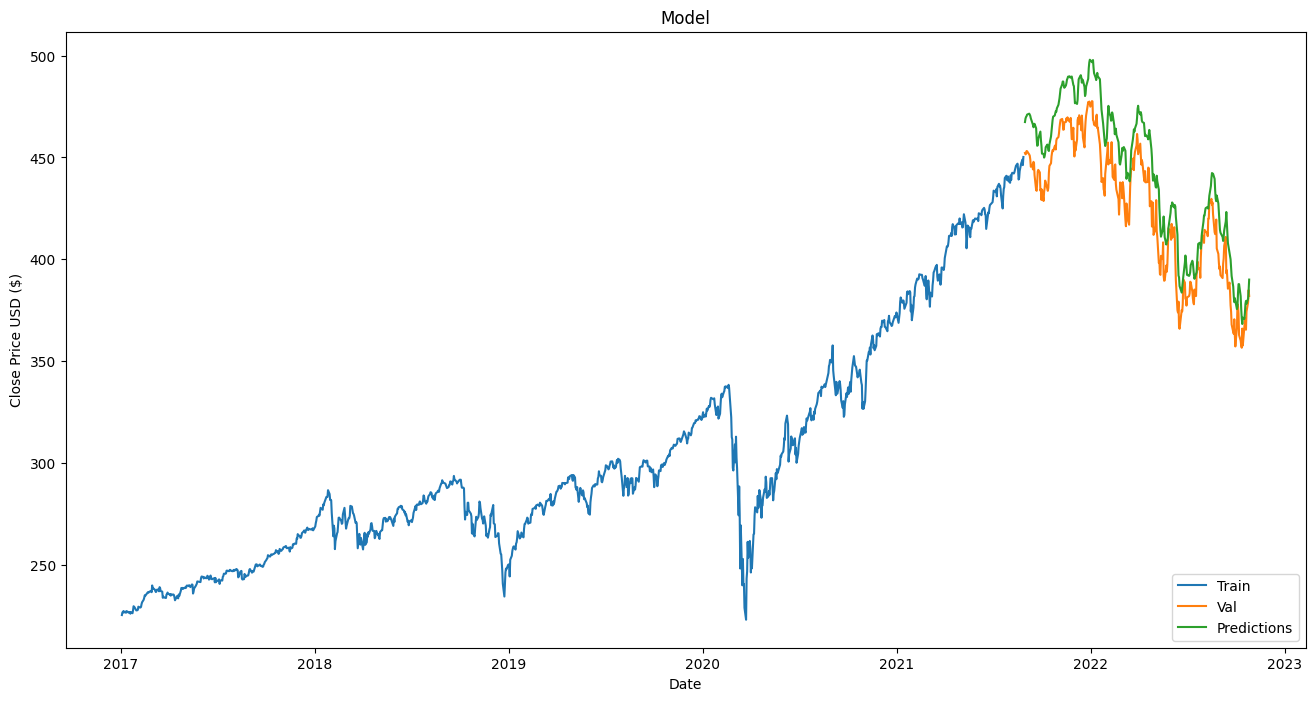

In [9]:
data = market_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig("spy_predictions.png")
plt.show()

In [10]:
# #Apply the RMSE formula to calculate the degree of 
#discrepancy between the predicted prices and real prices (y_test) and display the result.

rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"The root mean squared error is {rmse}.")

The root mean squared error is 17.72023348759466.


In [13]:
predictions

array([[467.41   ],
       [469.1439 ],
       [469.92838],
       [470.31607],
       [471.07788],
       [471.53348],
       [471.052  ],
       [470.4194 ],
       [469.22537],
       [466.95316],
       [466.0862 ],
       [464.84592],
       [465.8543 ],
       [466.54077],
       [464.33636],
       [459.2996 ],
       [455.76288],
       [455.95798],
       [459.2005 ],
       [461.9225 ],
       [462.7352 ],
       [458.7263 ],
       [455.81433],
       [451.87302],
       [451.78918],
       [449.94263],
       [450.66833],
       [452.3104 ],
       [455.0594 ],
       [456.3422 ],
       [455.2657 ],
       [453.62503],
       [453.19165],
       [456.40182],
       [460.33685],
       [463.2399 ],
       [466.14142],
       [468.43845],
       [470.06674],
       [470.60236],
       [471.79202],
       [472.7785 ],
       [472.47922],
       [474.14212],
       [475.90524],
       [477.38773],
       [479.08347],
       [481.38828],
       [483.8111 ],
       [485.9562 ],
